In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Otetaan seaborn-kirjastosta valmis datasetti kurjenmiekkoihin liittyen. Katsotaan miten eri lajikkeet (setosa, versicolor ja virginica) jakautuvat ominaisuuksien puolesta.

In [3]:
X = iris.drop("species", axis=1)

malli = KMeans(n_clusters=3)
malli.fit(X)

malli.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Monta yksilöä kuuluu mihinkin ryhmään:

In [4]:
X["K"] = malli.predict(X)
pd.crosstab(X["K"], "lkm")

col_0,lkm
K,
0,50
1,62
2,38


In [5]:
pd.crosstab(X["K"], iris["species"])

species,setosa,versicolor,virginica
K,,,
0,50,0,0
1,0,48,14
2,0,2,36


Tämän mukaan ryhmä 0 on virginiga, ryhmä 1 selvästi setosa ja ryhmä 2 todennäköisesti versicolor. Vertaillaan vielä näitä kuvaajilla, selvyyden vuoksi eri lajeille erilaiset merkit.

/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

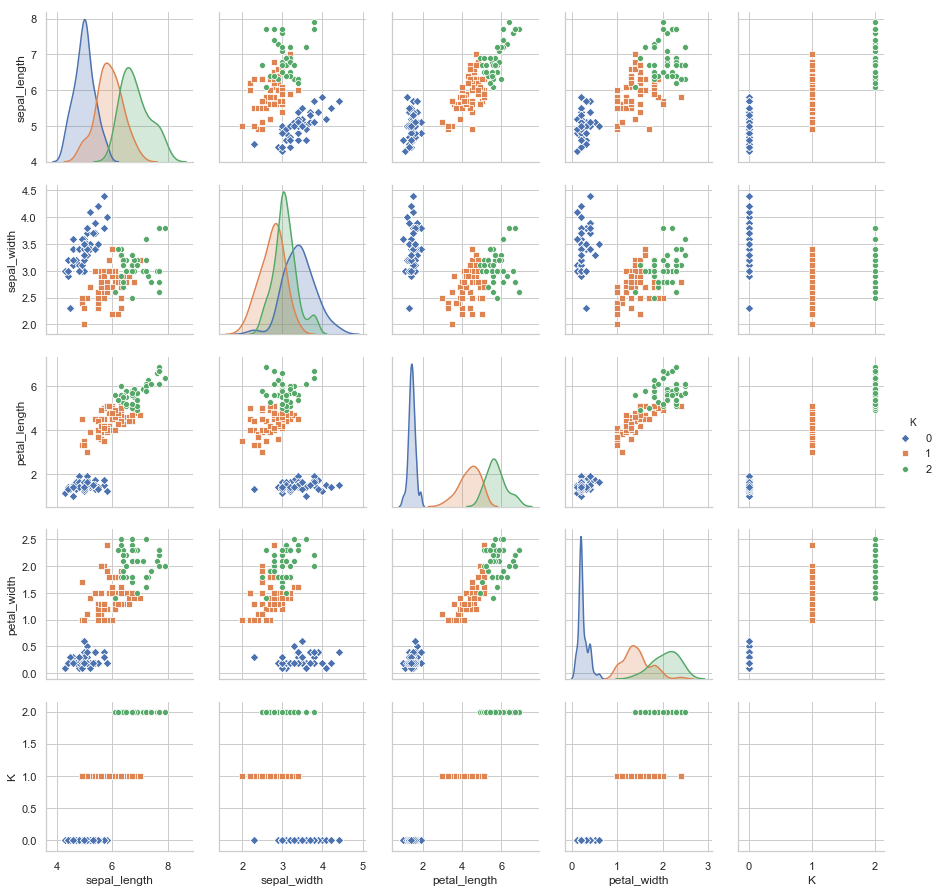

In [6]:
sns.pairplot(X, hue="K", markers = ["D", "s", "o"])